# Funciones

## Alcance de variables

Python organiza las variables utilizando **call stack**.

In [113]:

rock_type = 'unknown' # Variable global
# Función que crea  variables locales. 
def classify(rock_name):
    if rock_name in ['basalto', 'granito']: 
        rock_type = 'ígneo'
    elif rock_name in ['arenisca', 'esquista']: 
        rock_type = 'sedimentaria'
    else:
        rock_type = 'metamorfica'
    print('el tipo de la roca es:', rock_type)

In [114]:
classify("basalto") # imprimir variable local en classify

el tipo de la roca es: ígneo


In [115]:
print(rock_type) # imprimir variable global

unknown


![Alcance de una Variable](http://dep.fie.umich.mx/~job/media/images/callStack.png)

Cuando se invoca una función, Python crea un nuevo stack frame
- Una tabla de pares nombre/valor
- Los parámetros son precisamente variables locales que se inicializan automáticamente

Cuando se hace referencia a una variable, Python la busca en:
- La cima del stack frame, y después en 
- Las variables globales

## Reglas de paso de parámetros

Python copia los valores de las variables cuando se pasan a las funciones. Pero es importante recordar que las variables contienen referencias a listas.
 - Entonces los parámetros son aliases
 - Lo cual no es un problema para las cadenas, números y booleanos, ya que permenacen inmutables

In [116]:
def add_salt(first,second):
    first+="salt"
    second+=["salt"]

In [117]:
cadena="rock"
lista=["gneiss","shale"]

print("Antes")
print("Cadena:",cadena)
print("Lista:", lista)
add_salt(cadena,lista)
print("Después")
print("Cadena:",cadena)
print("Lista:", lista)


Antes
Cadena: rock
Lista: ['gneiss', 'shale']
Después
Cadena: rock
Lista: ['gneiss', 'shale', 'salt']


![Reglas de paso de parámetros](http://dep.fie.umich.mx/~job/media/images/parPassing.png)

### Elaboración de copias

 Para pasar la copia de una lista a una función se requiere dividirla (slicing)
     - values[:] es lo mismo que values[0:len(values)] ...
     - ... lo cual es una parte de values que incluye la lista completa...
     - ... y dividir crea una nueva lista

In [118]:
cadena="rock"
lista=["gneiss","shale"]

print("Antes")
print("Cadena:",cadena)
print("Lista:", lista)
add_salt(cadena,lista[:])
print("Después")
print("Cadena:",cadena)
print("Lista:", lista)

Antes
Cadena: rock
Lista: ['gneiss', 'shale']
Después
Cadena: rock
Lista: ['gneiss', 'shale']


![Elaboración de copias](http://dep.fie.umich.mx/~job/media/images/copy.png)

## Valores por defecto

Al definir una función se pueden especificar valores por defecto para los parámetros
- Sólo se requiere “asignar” algún valor al parámetro en la definición

Los parámetros que realmente se pasan cuando se llama a una función son asignados (matched up) de izquierda a derecha.
- Todos los parámetros con valores por defecto deben estar después de todos los parámetros sin valores por defecto.
- De lo contrario asignar valores a los parámetros


In [119]:
def total(valores, inicio=0, fin=None):
    # Si no hay valores, total el cero
    if not valores:
        return 0
    # si no se especifica el fin, se utiliza la secuencia completa.
    if fin is None:
        fin=len(valores)
    # Calcular el resultado
    resultado= 0
    for i in range(inicio,fin):
        resultado+=valores[i]
    return resultado

In [120]:
numeros=[10,20,30,40]

In [121]:
print("total(numeros,0,4):",total(numeros,0,4))
print("total(numeros,2):",total(numeros,2))
print("total(numeros):",total(numeros))
print("total(numeros,0,2):",total(numeros,fin=2))


total(numeros,0,4): 100
total(numeros,2): 70
total(numeros): 100
total(numeros,0,2): 30


## Funciones como parámetros

Las funciones son sólo un objeto más
- Pasan a ser un objeto que se puede llamar, tal como las cadenas y listas pasan a ser objetos que se pueden indexar
- **def** es simplemente una forma breve de "crear una función y asignarla a una variable

In [122]:
def circunferencia(r):
    return 2*3.14159*r

In [123]:
circ = circunferencia # Crear un alias de la función circinferencia
print("circunferencia(1)", circunferencia(1))
print("circ(1)", circ(1))

circunferencia(1) 6.28318
circ(1) 6.28318


El que las funciones sean objetos implica que:
- Redefinir funciones (tal como es posible reasignar valores a las variables
- Crear alias para las funciones
- Pasar funciones como parámetros 
- Almacenar funciones en listas

### Ejemplos de funciones como parámetros

- Como aplicar una función a cada valor de una lista:

In [124]:
def apply_to_list(funcion, lista):
    resultado=[]
    for x in lista:
        resultado.append(funcion(x))
    return resultado

In [125]:
radios=[1,3,5,7,9]
apply_to_list(circ,radios)

[6.28318, 18.849539999999998, 31.4159, 43.98226, 56.54862]

- aplicar varias funciones a un solo valor 

In [126]:
def area(r):
    return 3.14159*r**2

def diametro(r):
    return 2*r

def apply_each(funciones,valor):
    return [f(valor) for f in funciones]

In [127]:
r=1
apply_each([diametro,circunferencia,area],r)

[2, 6.28318, 3.14159]

* ¿Cómo puede implementar una función que aplicque un lista de funciones a una lista de valores?

### Atributos de funciones

Toda función tiene un atributo llamado **__name__**. Este es el nombre con el cual fue originalmente definida.

In [128]:
def sedimentaria():
    return ['sandstone','shale']
alias=sedimentaria

In [129]:
print("Nombre original:", sedimentaria.__name__)
print("Nombre del alias:", alias.__name__)

Nombre original: sedimentaria
Nombre del alias: sedimentaria


## Modulos

Todo archivo Python también es automácamente un modulo (o librería) –  Si el archivo se llama geology.py, se carga utilizando **import geology**

- Se refiere a su contenido como geology.thing 
- Tal como los métodos y atributos de un objeto

Agregando las siguientes líneas de código en *geology.py*

In [130]:
# Por ahora no definiremos modulos 
# sin embargo todas la librerías es similar al uso de modulos!
def tipo_de_roca(rock_name):      
    if rock_name in ['basalto', 'granito']: 
        rock_type = 'ígneo'
    elif rock_name in ['arenisca', 'esquista']: 
        rock_type = 'sedimentaria'
    else:
        rock_type = 'metamorfica'
    print('el tipo de la roca es:', rock_type)

Podríamos utilizar los métodos deifnidos en *geology* utilizando:

In [131]:
# Este código no funciona porque no hemos creado el archivo 
# geology.py
import geology
for rock in ['arenisca','basalto']:
    print(rock,"es",tipo_de_roca(rock))

el tipo de la roca es: sedimentaria
arenisca es None
el tipo de la roca es: ígneo
basalto es None


### Otras formas de importar

* import geology as g, posteriormente se invoca g.print_version()
* from geology import print_version, posteriormente se invoca print_version()
* from geology import * #importa todo de geology

### Auto-identificación
Dentro de un módulo, **\_\_name\_\_** está definido como:
- El nombre del módulo, si éste se importa
- O la cadena **\_\_main\_\_**, si es el programa principal (main)

Frecuentemente utilizado para incluir auto-pruebas en el módulo
- Se ejecutan las auto-pruebas cuando el módulo se corre de la línea de comandos
- Las pruebas se omiten cuando otro código carga el módulo

Por ejemplo si incluimos lo siguiente en *geology.py*

In [132]:
def is_rock(r):
    return r in ["basalt","granite","sandstone","shale"]

if __name__=="__main__":
    tests=[["basalt",True],["granite",True],
           ["grass",False],["sugar",False]]
    for r,v in tests:
        if v==is_rock(r):
            print("Pass")

Pass
Pass
Pass
Pass


Si importamos desde el notebook no se ejecuta la función **main**.

In [133]:
import geology

Pero sí desde una terminal

- python geology.py

![Terminal](http://dep.fie.umich.mx/~job/media/images/terminal.png)

## Sistemas de librerías

La librería más comúnmente utilizada en Python es la del sistema sys
- Información acerca del intérprete de Python (tal como el número de versión y copyright)
- Información acerca del ambiente (tal como el sistema operativo donde corre el programa)
- Caracterísicas avanzadas que simples mortales nunca deberían manipular

![Librería sys 1](http://dep.fie.umich.mx/~job/media/images/sys1.png)
![Librería sys 2](http://dep.fie.umich.mx/~job/media/images/sys2.png)

### Librería math

* Mucho de la librería estándar de Python es un envoltorio de las librerías standard de C
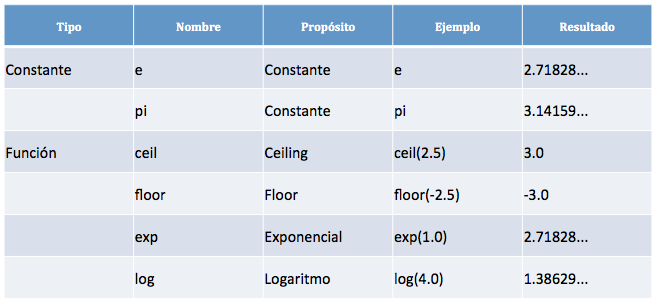


In [134]:
import math
print(math.e) # Constante de euler
print(math.log(4)) # Log base e
print(math.log(4,2))# Log base 2

2.718281828459045
1.3862943611198906
2.0


### Librería NumPy

NumPy proporciona una implemetación para arraglos N-dimesionales, la cual descirbe una colección de *items* homogéneos. Estos  arreglos pueden ser indizados de igual forma que los arreglos estándar de python. Los array de NumPy son más versatiles en cuanto a su indezación e implementan muchas funciones de algebra lineal (importantes dentro de machnine learning!)

#### Creación de arreglos 

In [135]:
import numpy as np
d=[[1, 2, 3], [4, 5, 6]] # python array de enteros de 2 filas y 3 columnas
nd = np.array(d, np.int32) # array de enteros de 2 filas y 3 columnas
type(nd) # verificando el tipo

numpy.ndarray

In [136]:
nd.shape  # dimensiones de nd (filas,columnas)

(2, 3)

In [137]:
nd.dtype # tipo de datos en nd

dtype('int32')

se puede indezar como un arreglo de python

In [138]:
nd[1,2] # el elemento en la posición 1,2

6

In [139]:
nd[1,:] # toda la fila 2

array([4, 5, 6], dtype=int32)

indezado versatil

In [140]:
nd[1,[0,2]] # los elementos 0 y 2 de la fila 1 

array([4, 6], dtype=int32)

In [141]:
nd[[0,1],1] # los elementos en la culumna 1 de las dos filas

array([2, 5], dtype=int32)

In [142]:
x[[0,1],1] # no es posible en arreglos de python!

NameError: name 'x' is not defined

#### Aritmética,  multiplicación de matrices y operadores de comparación

Las opercaiones aritméticas y de comparación en numpy array estan definidas elemento a elemento, y por lo general regresan un arreglo de numpy como salida.
Cada operacion aritmética **(+, -, \*, /, //, %, divmod(), \*\* or pow(), <<, >>, &, ^, |, ~)** y de comparación **(==, <, >, <=, >=, !=)**. Todas son implementada como parte del conjunto de funciones universales (Para más información consultar https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#ufuncs).

In [ ]:
a=np.array([1,3,5,7,9])
b=np.array([0,2,4,6,8])
# todos los elementos en b son menores que los elementos en a 
#(elemento a elemento como la suma vectorial)
b<=a 

In [ ]:
b/a # división elemento a elemento

In [ ]:
m=np.array([a,b])
print(m)

In [ ]:
m*m #Elemento a elemento = no es multiplicación matricial! 

Para operraciones matriciales tiene implementado un conjuto de métodos asociados al obejeto *ndarray*. 

Por ejemplo la multiplicación matricial:

In [ ]:
m.dot(m) # claro que falla

In [ ]:
m.dot(m.transpose()) # esto ocurre debido a?

Puede consultar todos los métodos disponibles en:

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html

### Librería para graficar (**matplotlib**)

Es una librería para graficación 2D la cual produce figuras en una amplia variedad de formatos.

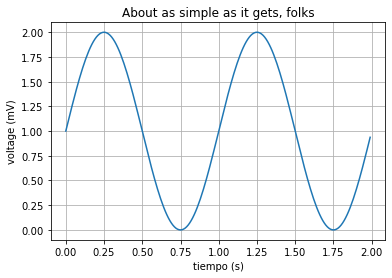

In [1]:
import matplotlib.pyplot as plt #importar función para graficar 
import numpy as np

t = np.arange(0.0, 2.0, 0.01) # rango numpy
s = 1 + np.sin(2*np.pi*t) # calcular seno para el rango
plt.plot(t, s) # graficar

plt.xlabel('tiempo (s)') # agregar etiqueta en el ejejx
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks') # poner titulo
plt.grid(True) # agregar  malla
plt.savefig("test.png") # guardar en formato png
plt.show() # mostrar en el notebook

* Gráfica de pastel

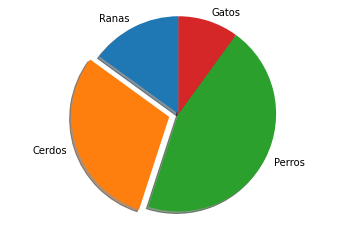

In [2]:
# Se grafican en sentido de las manecillas del reloj
etiquetas = ['Ranas', 'Cerdos', 'Perros', 'Gatos']
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # Resaltar la parte de Cerdos
fig1, ax1 = plt.subplots() # subplot, se define un objeto fig y los ejes
ax1.pie(sizes, explode=explode, labels=etiquetas, shadow=True, 
        startangle=90); # agregamos el paste
ax1.axis('equal');  # Aspecto uniforme.

plt.show()


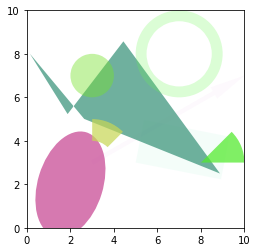

In [3]:
# Figuras geometicas
from matplotlib.patches import Ellipse,Rectangle,Arrow, Polygon,Wedge

n = 50

#elipses = [Ellipse(xy=np.random.rand(2) * 10,
#                width=np.random.rand(), height=np.random.rand(),
#                angle=np.random.rand() * 360)
#        for i in range(n)]
figuras=[Ellipse(xy=[2,2],width=3,height=5,angle=np.random.rand() * 360),
         Rectangle(xy=[5,3],width=4,height=2,angle=np.random.rand() * 360),
         Arrow(x=3, y=3, dx=7, dy=4, width=1),
         Polygon(np.random.rand(5, 2)*10, True),
         Wedge((3, 7), 1, 0, 360),             # Circulo
        Wedge((7, 8), 2, 0, 360, width=0.5),  # Aro
        Wedge((8, 3), 2, 0, 45),              # Sector
        Wedge((3, 3), 2, 45, 90, width=1),  # Sector-Aro
         
        ]
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'});
for e in figuras:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


* Referencia del api matplotlib: https://matplotlib.org/api/